In [3]:
# Инициализация
import matplotlib.pyplot as plt
%matplotlib inline

# Импорт библиотеки для квантовых вычилений Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Импорт построения гистограмм
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

# Основные квантовые вентили 

### X-вентиль
X-вентиль действует как вращение вокруг оси X сферы Блоха на $ \pi $ радиан.
Он отображает $ | 0 \rangle $ в $ | 1 \rangle $ и $ | 1 \rangle $ в $ | 0 \rangle $. Это квантовый эквивалент логического элемента НЕ для классических компьютеров. 

С элементами линейной алгебры вы можете ознакомиться по этой ссылке: https://qiskit.org/textbook/ch-appendix/linear_algebra.html.

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

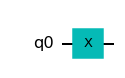

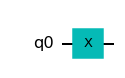

In [2]:
# Let's do an X-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.draw(output='mpl')

/home/gleb/.local/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


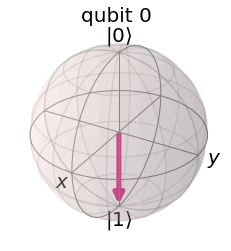

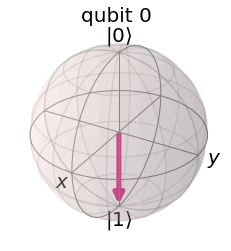

In [3]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### H-вентиль
Вентиль Адамара представляет собой поворот $ \pi $ вокруг оси, которая находится посередине оси $ X $ и оси $ Z $.
Он отображает базовое состояние $ | 0 \rangle $ в $ \frac{| 0 \rangle + | 1 \rangle} {\sqrt {2}} $, что означает, что измерение будет иметь равные вероятности быть "1" или «0», создавая «суперпозицию» состояний. Это состояние также записывается как $ | + \rangle $.

$H = \frac{1}{\sqrt {2}} \begin {pmatrix}
1 & 1 \\
1 & -1 \\
\end {pmatrix} $

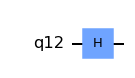

In [10]:
# Let's do an H-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.draw(output='mpl')

/Users/maksimgavreev/opt/anaconda3/envs/quantum_env/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


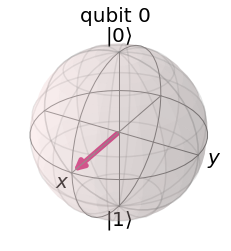

In [11]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### Z-вентиль
Вентиль Z представляет собой поворот вокруг оси Z сферы Блоха на $ \pi $ радиан. Иногда его называют «фазовый вентиль».

$ Z = \begin {pmatrix}
1 & 0 \\
0 & -1 \\
\end {pmatrix} $

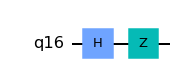

In [12]:
# Let's do an Z-gate on |+>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.z(q[0])
qc.draw(output='mpl')

/Users/maksimgavreev/opt/anaconda3/envs/quantum_env/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


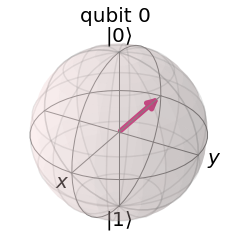

In [13]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### CX-вентиль (CNOT)
Управляемый вентиль NOT (или CNOT или CX) действует на два кубита. Он выполняет операцию НЕ (эквивалентную применению X-элемента) на втором кубите только тогда, когда первый кубит равен $ | 1 \rangle $, и в противном случае оставляет его без изменений. Примечание. Qiskit нумерует биты в строке справа налево.

$ CX = \begin {pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end {pmatrix} $

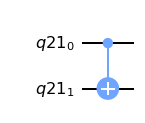

In [14]:
# Let's do an CX-gate on |00>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw(output='mpl')

### CZ-вентиль
CZ-вентиль действует на два кубита, называемых «контрольным битом» и «целевым битом». Он меняет знак (эквивалентно применению Z-элемента с фазовым сдвигом) целевого кубита тогда и только тогда, когда управляющий кубит равен $ | 1 \rangle $.

$ CZ = \begin {pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end {pmatrix} $

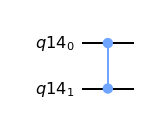

In [9]:
# Let's do an CZ-gate on |00>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw(output='mpl')

Примечание: CZ-вентиль также может быть построен из CX и H.

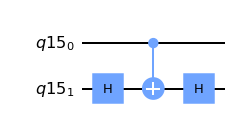

In [10]:
# Получим CZ-вентиль из CX и H
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.draw(output='mpl')

### CCX-вентиль
CCX также называют вентилем Тоффоли.
Логический элемент CCX представляет собой трехбитовый вентиль с двумя управляющими кубитами и одним управляемым в качестве входа и выхода. Если первые два бита находятся в состоянии $ | 1 \rangle $, он применяет X (или НЕ) к третьему биту. В противном случае ничего не происходит.

$ CCX = \begin {pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end {pmatrix} $

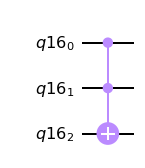

In [11]:
# Let's do an CCX-gate on |00>
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.ccx(q[0],q[1],q[2])
qc.draw(output='mpl')

### OR-вентиль

|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

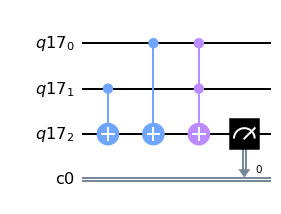

In [12]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### XOR-вентиль
|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

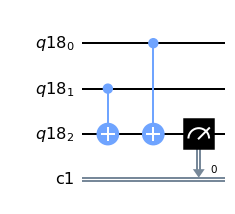

In [13]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### NOR-вентиль

|A(input)|B(input)|output|
|--|--|--|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|0|

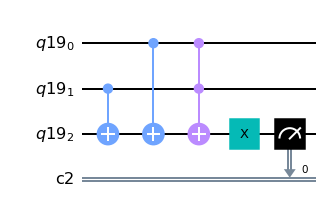

In [14]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

# Сумматор
Сумматор - это цифровая логическая схема, которая выполняет сложение чисел.

В этом примере мы рассмотрим простейшие сумматоры, а именно полусумматор и полный сумматор.

## Полусумматор
Полусумматор используется для сложения двух младших цифр в двоичной сумме.
Он имеет два одиночных двоичных входа, называемых A и B, и два выхода C (выполнение) и S (сумма).
Выход C будет использоваться как вход для полного сумматора, который будет объяснен позже, для получения значения в старшей цифре.

Полусумматоры можно описать с помощью приведенной ниже таблицы истинности.

| A (ввод) | B (ввод) | S (сумма) | C  |
| ----------- | ------------ | ------------ | ----------- - |
| 0 | 0 | 0 | 0 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 0 | 1 |

Из таблицы истинности вы должны заметить, что выход переноса C является результатом работы логического элемента И против A и B, где выход S является результатом операции XOR против A и B.
Поскольку мы уже создали вентили AND и XOR, мы можем объединить эти вентили и создать полусумматор следующим образом.

Мы обозначаем наш квантовый регистр как 'q', классические регистры как 'c', назначаем входы A и B для q [0] и q [1], выход суммы S и переносим выход C в q [2] и q [3 ].

{'00': 1000}


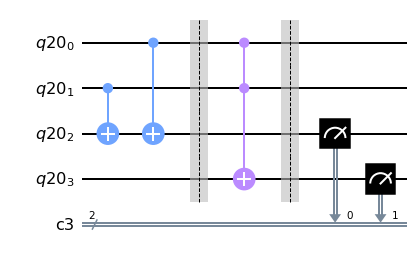

In [15]:
#Define registers and a quantum circuit
q = QuantumRegister(4)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#XOR
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.barrier()

#AND
qc.ccx(q[0], q[1], q[3])
qc.barrier()

#Sum
qc.measure(q[2], c[0])
#Carry out
qc.measure(q[3], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

# Алгоритм Гровера 

Рассмотрим известный квантовй алгоритм, называемый алгоритмом Гровера.

Возможно, вы слышали, что одним из преимуществ квантового компьютера перед классическим компьютером является его превосходная скорость поиска в базах данных. <br/>
Алгоритм Гровера демонстрирует эту возможность. Этот алгоритм может ускорить задачу неструктурированного поиска квадратично (классическое вычисление требует порядка $ N $ шагов для поиска $ N $ записей, в то время как квантовый компьютер требует всего $ \sqrt {N} $), но его использование расширяет сверх того; он может служить общим приемом или подпрограммой для получения квадратичных улучшений времени выполнения для множества других алгоритмов. Это называется усилением амплитуды.

Эта страница проведет вас через описание проблемы поиска, построение оракула - схематическое представление нашей задачи поиска и реализацию полного алгоритма Гровера в Qiskit.

## Неструктурированный поиск
Предположим, вам дан большой список из $ N $ элементов. Среди этих предметов есть один предмет с уникальным свойством, которое мы хотим найти; мы назовем его победителем, $ {w} $. Думайте о каждом элементе в списке как о коробке определенного элемента. Скажем, все элементы в списке имеют элементы серого цвета, кроме выигравшего.

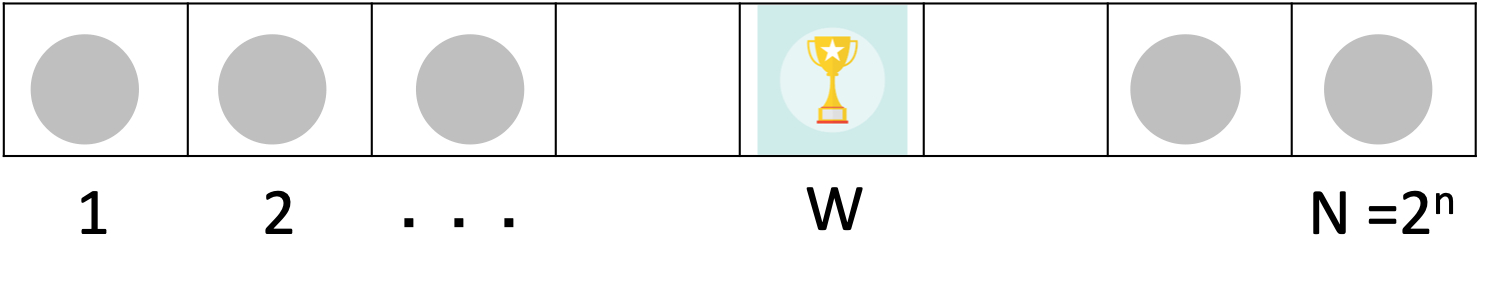

In [16]:
from IPython.display import Image, display
Image('unstructured_search.png', width="700")



Чтобы найти отмеченный элемент с помощью классических вычислений, нужно было бы проверить в среднем $ N / 2 $ этих квадратов, а в худшем случае - все $ N $ из них. Однако на квантовом компьютере мы можем найти отмеченный элемент примерно за $ \ sqrt {N} $ шагов с помощью усиления амплитуды. Квадратичное ускорение действительно существенно экономит время при поиске отмеченных элементов в длинных списках. Кроме того, алгоритм не использует внутреннюю структуру списка, что делает его универсальным; вот почему он сразу обеспечивает квадратичное квантовое ускорение для многих классических задач.

# Создание оракула, который отмечает выигрышный предмет
Каким образом элементы списка будут переданы квантовому компьютеру? Обычный способ кодирования такого списка - использовать функцию $ f $, которая возвращает $ f (x) = 0 $ для всех немаркированных элементов $ x $ и $ f (w) = 1 $ для победителя. Чтобы использовать квантовый компьютер для решения этой проблемы, мы должны предоставить элементы в суперпозиции к этой функции, поэтому мы кодируем функцию в унитарную матрицу, называемую ** оракулом **. Сначала мы выбираем двоичную кодировку элементов $ x, w \in \{0,1 \}^n $ так, чтобы $ N = 2^n $. Таким образом, мы можем представить его в виде кубитов на квантовом компьютере. Затем мы определяем матрицу оракула $ U_w $ для воздействия на любое из простых стандартных состояний базиса $ | x \rangle $ с помощью $ U_w | x \rangle = (-1) ^ {f (x)} | x \rangle $

Мы видим, что если $ x $ - это немаркированный элемент, оракул ничего не делает с состоянием. Однако, когда мы применяем оракул к состоянию $ | w \rangle $, он отображает $ U_w | w \rangle = - | w \rangle $. Геометрически эта унитарная матрица соответствует отражению относительно начала координат отмеченного объекта в $ N = 2 ^ n $ -мерном векторном пространстве.

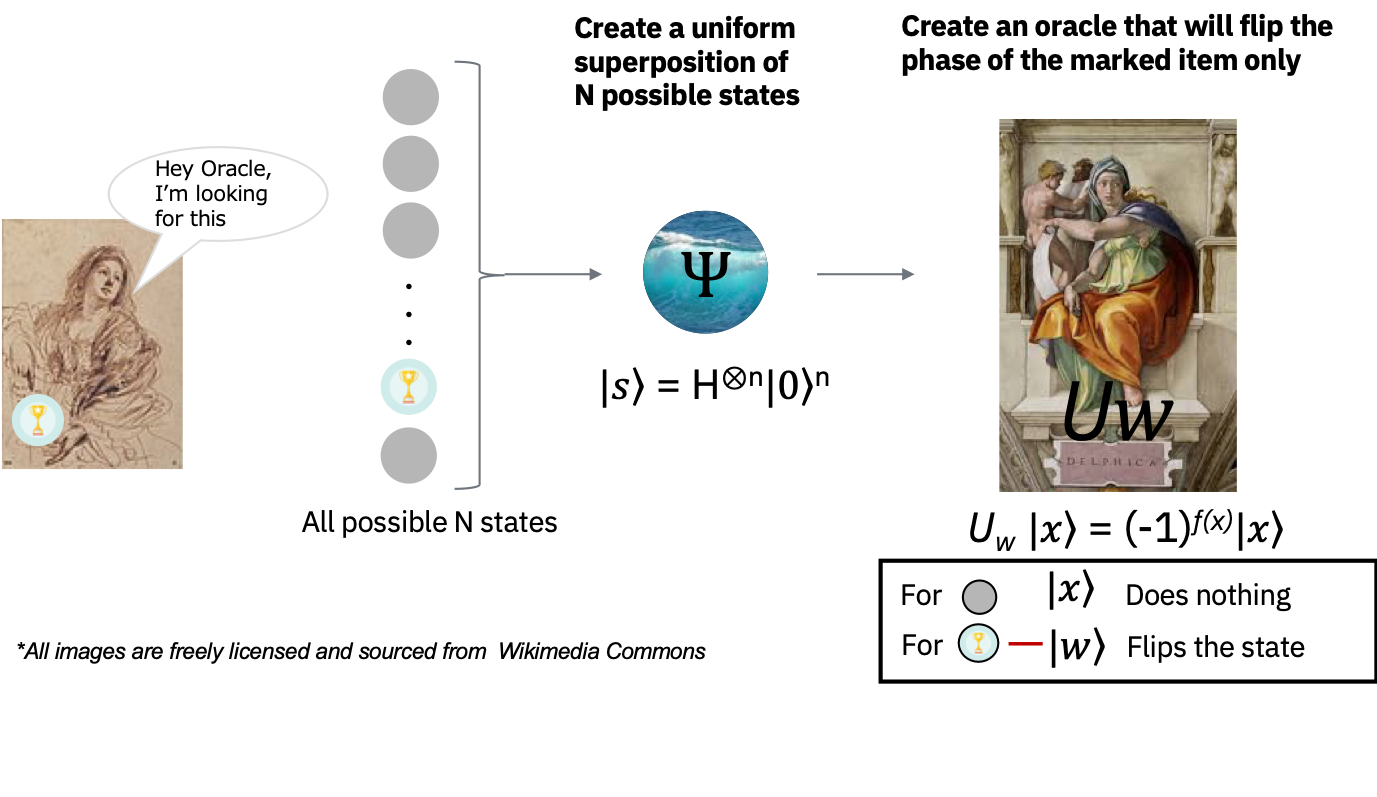

In [17]:
Image("oracle.png", width="700")

# Усиление амплитуды
Итак, как работает алгоритм? Если посмотреть на список, мы понятия не имеем, где находится отмеченный предмет. Поэтому любое предположение о его местонахождении ничуть не хуже любого другого. Возможно, вы слышали термин "суперпозиция". Это можно выразить в виде однородной суперпозиции: <br/>
$$ | s \rangle = \frac {1} {\sqrt N} \sum_{x = 0} ^ {N-1} | x \rangle $$

Если бы на этом этапе мы измеряли в стандартном базисе $ | x \rangle $, эта суперпозиция коллапсировала бы в любое из базисных состояний с той же вероятностью $ \frac {1} {N} = \frac {1} {2 ^ {n}} $. Таким образом, наши шансы угадать правильное значение $ | w \rangle $ равны $ \frac {1} {2 ^ {n}} $, как и следовало ожидать. Следовательно, в среднем нам нужно будет попытаться приблизительно $ N = 2 ^ {n} $ раз, чтобы угадать правильный элемент.

Теперь давайте перейдем к процедуре, называемой усилением амплитуды, с помощью которой квантовый компьютер значительно увеличивает вероятность нахождения нужного объекта. Эта процедура увеличивает амплитуду отмеченного элемента, что уменьшает амплитуды других элементов, так что измерение конечного состояния вернет правильный элемент почти с достоверностью.

Этот алгоритм имеет красивую геометрическую интерпретацию в терминах двух отражений, которые генерируют вращение в двухмерной плоскости. Единственные два особых состояния, которые нам нужно рассмотреть, - это победитель $ | w \rangle $ и равномерная суперпозиция $ | s \rangle $. Эти два вектора покрывают двумерную плоскость в векторном пространстве $ \mathbb C ^ {N} $. Они не совсем перпендикулярны, потому что $ | w \rangle $ также встречается в суперпозиции с амплитудой $ N ^ {- 1/2} $.

Однако мы можем ввести дополнительное состояние $ | s '\rangle $, которое находится в промежутке между этими двумя векторами, перпендикулярно $ | w \rangle $ и получается из $ | s \rangle $ удалением $ | w \rangle $ и изменение масштаба.

** Шаг 0 **:
Процедура усиления амплитуды начинается с однородной суперпозиции $ | s \rangle $. Равномерную суперпозицию легко построить из $ | s \rangle = H ^ {\otimes n} | 0 \rangle ^ {n} $. При $ t = 0 $ начальное состояние равно $ | \psi_ {0} \rangle = | s \rangle $.

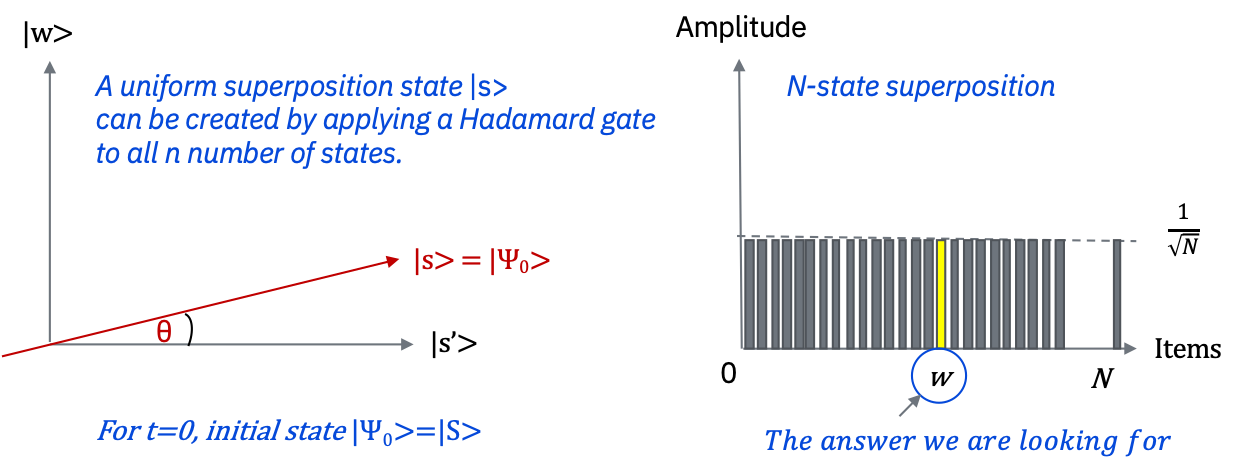

In [18]:
Image("step0.png", width="700")

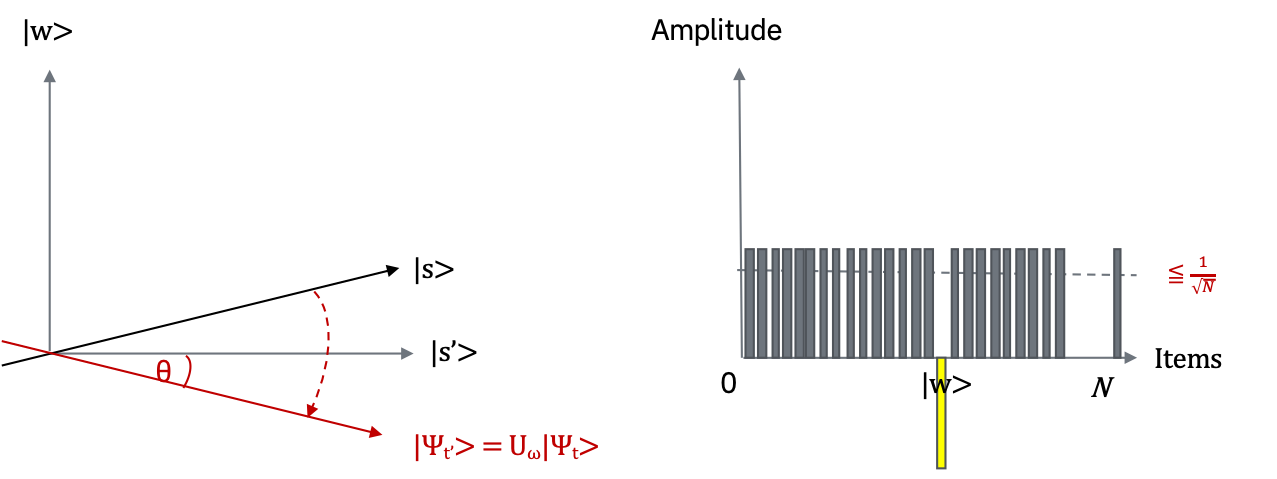

In [19]:
Image("step1.png", width="700")

Геометрически это соответствует отражению состояния $ | \psi_ {t} \rangle $ около $ | s '\rangle $. Это преобразование означает, что амплитуда перед состоянием $ | w \rangle $ становится отрицательной, что, в свою очередь, означает, что средняя амплитуда была понижена. (Обратите внимание, как пунктирная линия на правом графике уменьшается).

**Шаг 2**:
Теперь применим дополнительное отражение $ U_ {s} $ о состоянии $ | s \rangle $: $ U_ {s} = 2 | s \rangle \langle s | - 1 $. Это преобразование отображает состояние в $ U_ {s} | \psi_ {t '} \rangle $ и завершает преобразование $ | \psi_ {t + 1} \rangle = U_ {s} U_ {w} | \psi_ {t } \rangle $. （Обратите внимание на усиление амплитуды в точке $ | w \rangle $ на правом графике).

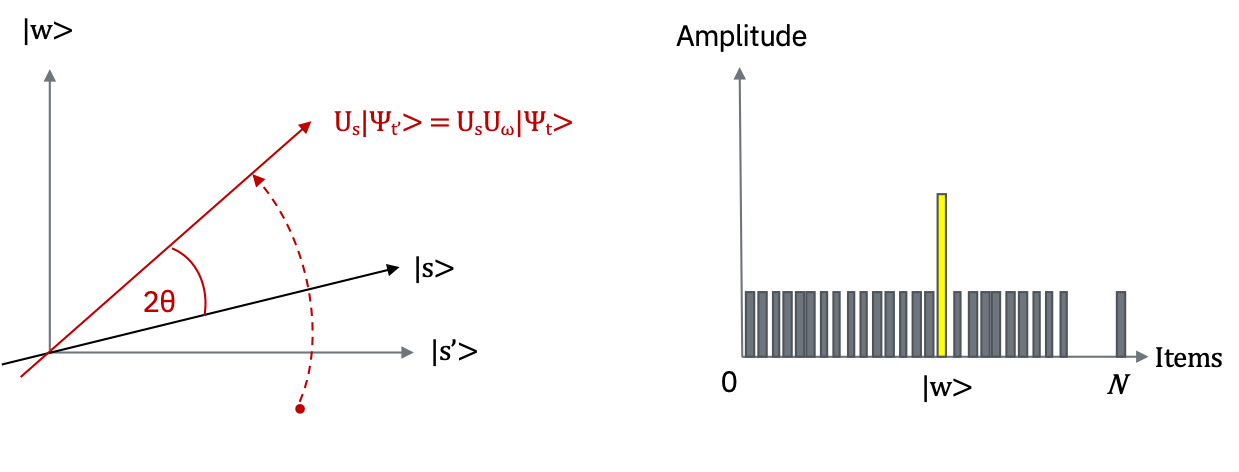

In [20]:
Image("step2.png", width="700")

Два отражения всегда соответствуют вращению. Преобразование $ U_ {s} U_ {w} $ поворачивает начальное состояние $ | s \rangle $ ближе к победителю $ | w \rangle $. Обратите внимание на левый график на шаге 2. Действие отражения $ U_ {s} $ на гистограмме амплитуды можно понимать как отражение средней амплитуды. Поскольку средняя амплитуда была понижена первым отражением, это преобразование увеличивает отрицательную амплитуду $ | w \rangle $ примерно в три раза по сравнению с исходным значением, в то время как остальные амплитуды уменьшаются. Затем мы переходим к ** Шагу １ **, чтобы повторить приложение. Эта процедура будет повторяться несколько раз, чтобы определить победителя.

После $ t $ шагов состояние изменится на $ | \psi_ {t} \rangle = (U_ {s} U_ {w}) ^ {t} | \psi_ {0} \rangle $.

Сколько раз нам нужно применить вращение? Оказывается, достаточно примерно $ \sqrt N $ вращений. Это становится ясно, если посмотреть на амплитуды состояния $ | \psi_ {t} \rangle $. Мы видим, что амплитуда $ | w \rangle $ линейно растет с количеством приложений （$ \sim tN ^ {1/2} $）. Однако, поскольку мы имеем дело с амплитудами, а не с вероятностями, размерность векторного пространства входит как квадратный корень. Следовательно, в этой процедуре усиливается амплитуда, а не только вероятность.

Если существует несколько решений, $ M $, можно показать, что примерно $ \sqrt {(N / M)} $ вращений будет достаточно.

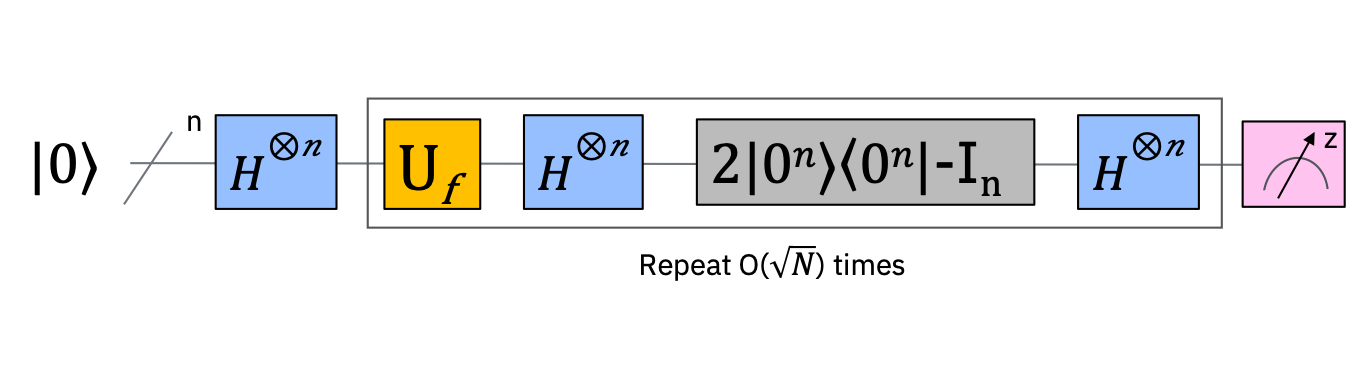

In [21]:
Image("grover_algorithm.png", width="700")

### Реализация Qiskit: алгоритм Гровера с использованием двух кубитов
Теперь давайте усовершенствуем алгоритм Гровера с помощью Qiskit. В этом примере мы будем использовать два кубита, чтобы найти состояние $ | 11 \rangle $.

Мы создадим оракула, который изменит фазу ответа, который мы ищем (в данном случае $ | 11 \rangle $) с помощью вспомогательного бита, чтобы изменить фазу целевого бита, когда состояние входа равно $ | 11 \rangle $. Обратите внимание, что для того, чтобы этот переворот фазы работал, вам необходимо подготовить вспомогательный бит, чтобы он был $ | 1 \rangle $, используя вентиль X.

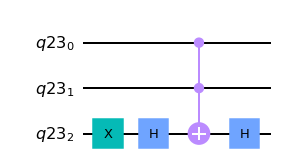

In [16]:
def phase_oracle(circuit, register,oracle_register):
    circuit.h(oracle_register)
    circuit.ccx(register[0], register[1],oracle_register)
    circuit.h(oracle_register)
    
qr = QuantumRegister(3)
oracleCircuit = QuantumCircuit(qr)
oracleCircuit.x(qr[2])
phase_oracle(oracleCircuit, qr,qr[2])
oracleCircuit.draw(output="mpl")

Затем мы настраиваем схему для инверсии относительно среднего, как мы видели на шаге 2. Эту схему иногда называют модулем усиления амплитуды или схемой диффузии.

In [17]:
def inversion_about_average(circuit, register):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0], register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)

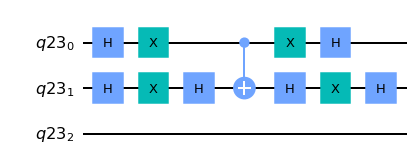

In [18]:
qAverage = QuantumCircuit(qr)
inversion_about_average(qAverage, qr[0:2])
qAverage.draw(output='mpl')

Теперь мы соединяем части вместе, создав однородную суперпозицию в начале схемы и измерение в конце. Обратите внимание, что, поскольку существует одно решение и четыре возможности, нам нужно будет выполнить только одну итерацию.

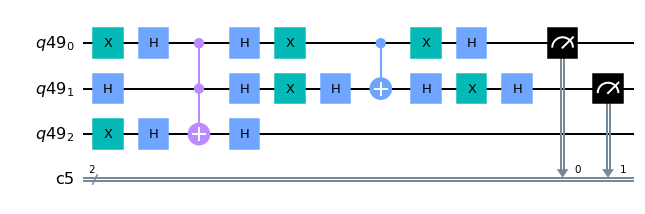

In [26]:
qr = QuantumRegister(3)
cr = ClassicalRegister(2)

groverCircuit = QuantumCircuit(qr,cr)

groverCircuit.x(qr[0])
groverCircuit.h(qr[0:2])
groverCircuit.x(qr[2])

phase_oracle(groverCircuit, qr,qr[2])
inversion_about_average(groverCircuit, qr[0:2])

groverCircuit.measure(qr[0:2],cr)
groverCircuit.draw(output="mpl")

### Эксперимент с симулятором
Теперь запустим эту схему на симуляторе. Не забудьте указать qasm_simulator в качестве бэкэнда.

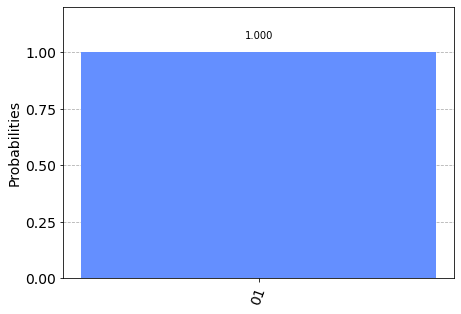

In [27]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

# Задача

Пусть имеется шахматная доска размера 3x3. На ней необходимо расставить три ладьи таким образом, чтобы никакие две их них не били друг друга. Решение предлагается искать с помощью алгоритма Гровера.

Посказка: попробуйте использовать сумматор

In [27]:
def inversion_about_average(circuit, register):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[-1])
    circuit.mct(register[0:-1], register[-1])
    circuit.h(register[-1])
    circuit.x(register)
    circuit.h(register)

Ниже подготовлена основа для решения (решение данной задачи потребует добавления кубитов)

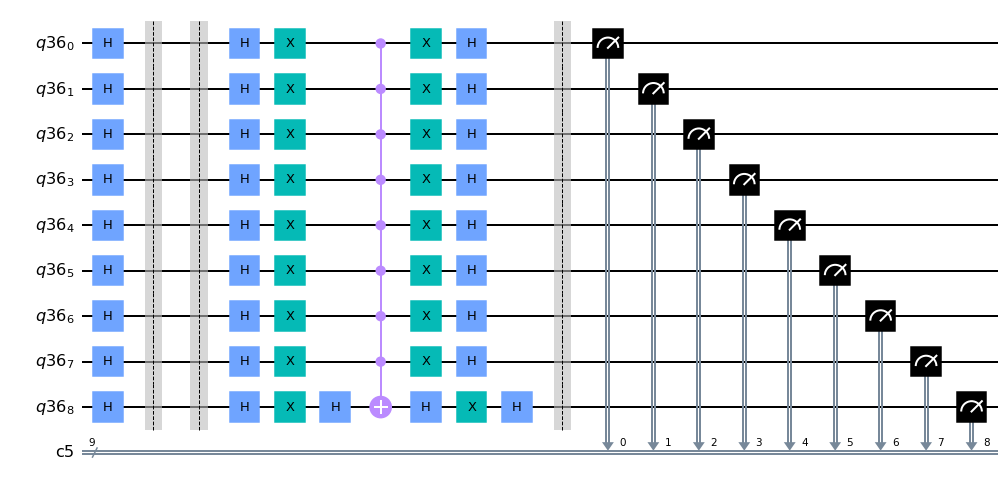

In [28]:
qr = QuantumRegister(9)
cr = ClassicalRegister(9)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)
groverCircuit.barrier()

#
#
#
# Enter your code here 
#
#
#

groverCircuit.barrier()
inversion_about_average(groverCircuit, qr)

groverCircuit.barrier()
groverCircuit.measure(qr, cr)
groverCircuit.draw(output="mpl")

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [78]:
import numpy as np

In [81]:
var_qbits = QuantumRegister(9, name='v')
FP_qbits = QuantumRegister(6, name='fp')
LP_qbits = QuantumRegister(6, name='lp')
StageI_out = QuantumRegister(1, name='i')
OUT_qbits = QuantumRegister(1, name='out')
cr = ClassicalRegister(9)

qc = QuantumCircuit(var_qbits, LP_qbits, FP_qbits, OUT_qbits, StageI_out, cr)
sm = QuantumCircuit(var_qbits, LP_qbits, FP_qbits)
fsm = QuantumCircuit(var_qbits, FP_qbits)
ORrev = QuantumCircuit(FP_qbits, LP_qbits)
tof = QuantumCircuit(LP_qbits, StageI_out)


def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

def OR(qc, a, b, output):
    qc.cx(b, output)
    qc.cx(a, output)
    qc.ccx(a, b, output)

def ORR(qc, a, b, output):
    global ORrev
    ORrev.cx(b, output)
    ORrev.cx(a, output)
    ORrev.ccx(a, b, output)

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  
    qc.h(nqubits-1)
    for qubit in range(nqubits):
        qc.x(qubit)
    for qubit in range(nqubits):
        qc.h(qubit)
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s
    
'''
def sum_3(qc, a, b, c, clauses, FP, LP):
    XOR(qc, a, b, clauses[0])
    qc.ccx(a, b, clauses[1])
    XOR(qc, c, clauses[0], LP)
    qc.ccx(c, clauses[0], FP)
'''

def sum_3(qc, a, b, c, FP, LP):
    global sm
    qc.ccx(a, b, FP)
    qc.cnot(a, b)
    qc.ccx(b, c, FP)
    qc.cx(c, LP)
    qc.cnot(b, LP)
    qc.cnot(a, b)
    
    sm.ccx(a, b, FP)
    sm.cnot(a, b)
    sm.ccx(b, c, FP)
    sm.cx(c, LP)
    sm.cnot(b, LP)
    sm.cnot(a, b)

def sum_FP(qc, a, b, c, FP):
    global fsm
    qc.ccx(a, b, FP)
    qc.cnot(a, b)
    qc.ccx(b, c, FP)
    qc.cnot(a, b)
    
    
    fsm.ccx(a, b, FP)
    fsm.cnot(a, b)
    fsm.ccx(b, c, FP)
    fsm.cnot(a, b)

to_sum = [[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8],
         [0, 3, 6],
         [1, 4, 7],
         [2, 5, 8]]

def sum_everything(qc, FP_qbits, LP_qbits):
    i = 0
    for parameter_tuple in to_sum:
        a, b, c = parameter_tuple
        sum_3(qc, var_qbits[a], var_qbits[b], var_qbits[c], FP_qbits[i], LP_qbits[i])
        i += 1

def sum_everything_FP(qc, FP_qbits):
    i = 0
    for parameter_tuple in to_sum:
        a, b, c = parameter_tuple
        sum_FP(qc, var_qbits[a], var_qbits[b], var_qbits[c], FP_qbits[i])
        i += 1

def rooks_oracle(qc, OUT_qbits, FP_qbits, LP_qbits):
    sum_everything(qc, FP_qbits, LP_qbits)
    sm_gate = sm.to_gate()
    sm_gate_inv = sm_gate.inverse()
    sm_gate_inv.name = "Full Sum Inverse Gate"
    qc.mct(LP_qbits, StageI_out)
    tof.mct(LP_qbits, StageI_out)
    tof_gate = tof.to_gate()
    tof_gate_inv = tof_gate.inverse()
    tof_gate_inv.name = "Toffoli Inverse Gate"
    
    
    qc.append(sm_gate_inv, [i for i in var_qbits] + [i for i in LP_qbits] + [i for i in FP_qbits])
    
    qc.barrier()
    sum_everything_FP(qc, FP_qbits)
    qc.barrier()
    fsm_gate = fsm.to_gate()
    fsm_gate_inv = fsm_gate.inverse()
    fsm_gate_inv.name = "Partial Sum Inverse Gate"
    
    OR(qc, FP_qbits[0], FP_qbits[1], LP_qbits[0])
    OR(qc, FP_qbits[2], FP_qbits[3], LP_qbits[1])
    OR(qc, FP_qbits[4], FP_qbits[5], LP_qbits[2])
    
    OR(qc, LP_qbits[0], LP_qbits[1], LP_qbits[3])
    OR(qc, LP_qbits[2], LP_qbits[3], LP_qbits[4])
    qc.x(LP_qbits[4])
    
    #---- Building reverse circuit
    ORR(qc, FP_qbits[0], FP_qbits[1], LP_qbits[0])
    ORR(qc, FP_qbits[2], FP_qbits[3], LP_qbits[1])
    ORR(qc, FP_qbits[4], FP_qbits[5], LP_qbits[2])
    
    ORR(qc, LP_qbits[0], LP_qbits[1], LP_qbits[3])
    ORR(qc, LP_qbits[2], LP_qbits[3], LP_qbits[4])
    ORrev.x(LP_qbits[4])
    #-----
    
    or_gate = ORrev.to_gate()
    or_gate_inv = or_gate.inverse()
    or_gate_inv.name = "OR-Chain Inverse Gate"
    
    qc.ccx(LP_qbits[4], StageI_out[0], OUT_qbits[0])
    
    qc.append(or_gate_inv, [i for i in FP_qbits] + [i for i in LP_qbits])
    qc.append(fsm_gate_inv, [i for i in var_qbits] + [i for i in FP_qbits])
    sm_gate.name = "Full Sum"
    qc.append(sm_gate, [i for i in var_qbits] + [i for i in LP_qbits] + [i for i in FP_qbits])
    qc.append(tof_gate_inv, [i for i in LP_qbits] + [i for i in StageI_out])
    qc.append(sm_gate_inv, [i for i in var_qbits] + [i for i in LP_qbits] + [i for i in FP_qbits])
    
    qc.barrier()
    
    
    
    
    #sum_3(qc, FP_qbits[0], FP_qbits[1], FP_qbits[2], LP_qbits[0])
    #sum_3(qc, FP_qbits[3], FP_qbits[4], FP_qbits[5], LP_qbits[1])
    

qc.initialize([1, -1]/np.sqrt(2), OUT_qbits)
qc.h(var_qbits)
qc.barrier()

rooks_oracle(qc, OUT_qbits, FP_qbits, LP_qbits)
qc.barrier()
qc.append(diffuser(9), [i for i in var_qbits])

rooks_oracle(qc, OUT_qbits, FP_qbits, LP_qbits)
qc.barrier()
qc.append(diffuser(9), [i for i in var_qbits])
qc.measure(var_qbits, cr)


qc.draw(fold=-1)

        
        




┌───┐               ░                                                                                                                                        ┌─────────────────────────┐ ░                                                                                            ░                                                                                                                 ┌────────────────────────────┐┌────────────┐                         ┌─────────────────────────┐ ░  ░ ┌────────┐                                                                                                                                       ┌─────────────────────────┐ ░                                                                                            ░                                                                                                                 ┌────────────────────────────┐┌────────────┐                         ┌─────────────────────────┐ ░  ░ ┌────────┐┌─┐                        
  v_0: ─────────────┤ H ├───────────────░───■────■─────────────────────────────────────────────────■───────────────────■─────────■───────────────────────────────────────■───────┤0                        ├─░───■────■───────────────────■───────────────────■──────────────■──────────────■─────────────░─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                           ├┤0           ├─────────────────────────┤0                        ├─░──░─┤0       ├──■────■─────────────────────────────────────────────────■───────────────────■─────────■───────────────────────────────────────■───────┤0                        ├─░───■────■───────────────────■───────────────────■──────────────■──────────────■─────────────░─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                           ├┤0           ├─────────────────────────┤0                        ├─░──░─┤0       ├┤M├────────────────────────
                    ├───┤               ░   │  ┌─┴─┐                                             ┌─┴─┐                 │         │                                       │       │                         │ ░   │  ┌─┴─┐               ┌─┴─┐                 │              │              │             ░                                                                                                                 │                            ││            │                         │                         │ ░  ░ │        │  │  ┌─┴─┐                                             ┌─┴─┐                 │         │                                       │       │                         │ ░   │  ┌─┴─┐               ┌─┴─┐                 │              │              │             ░                                                                                                                 │                            ││            │                         │                         │ ░  ░ │        │└╥┘┌─┐                     
  v_1: ─────────────┤ H ├───────────────░───■──┤ X ├────────────■─────────────────────────────■──┤ X ├─────────────────┼────■────┼────■──────────────────────────────────┼────■──┤1                        ├─░───■──┤ X ├────────────■──┤ X ├─────────────────┼────■─────────┼────■─────────┼─────────■───░─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1                           ├┤1           ├─────────────────────────┤1                        ├─░──░─┤1       ├──■──┤ X ├────────────■─────────────────────────────■──┤ X ├─────────────────┼────■────┼────■──────────────────────────────────┼────■──┤1                        ├─░───■──┤ X ├────────────■──┤ X ├─────────────────┼────■─────────┼────■─────────┼─────────■───░─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1                      

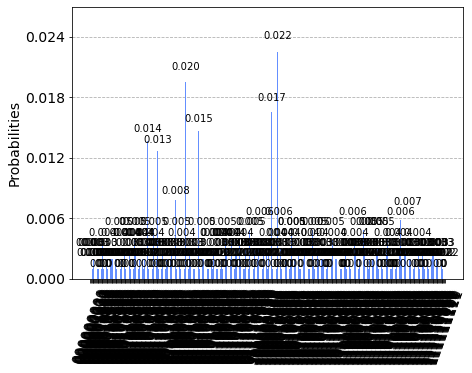

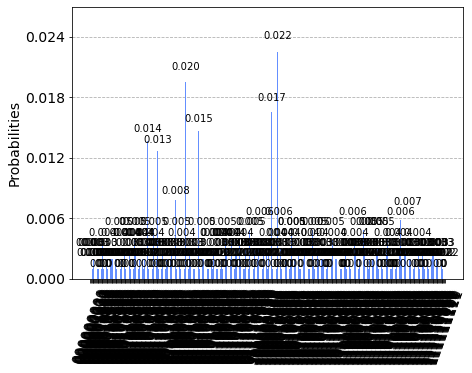

In [82]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [83]:
answer

{'101000000': 4,
 '111111101': 1,
 '110000010': 3,
 '110011100': 3,
 '001110001': 3,
 '101110011': 1,
 '011001000': 1,
 '000010110': 2,
 '101111001': 3,
 '011101100': 1,
 '010000111': 3,
 '110011000': 1,
 '000011101': 2,
 '001011010': 3,
 '011011111': 2,
 '011001010': 3,
 '010100101': 5,
 '010011100': 2,
 '000010111': 1,
 '101101010': 2,
 '000001000': 3,
 '001100010': 13,
 '111000000': 2,
 '001111101': 8,
 '010111000': 4,
 '011111010': 6,
 '001111001': 2,
 '100010001': 23,
 '011011011': 1,
 '000001001': 3,
 '000011111': 2,
 '110110100': 2,
 '010100001': 15,
 '111010111': 1,
 '010001001': 1,
 '111011100': 4,
 '011010011': 3,
 '101111000': 1,
 '100000010': 2,
 '111110101': 2,
 '110000011': 6,
 '110110101': 1,
 '000111111': 5,
 '111101000': 1,
 '110001100': 1,
 '110001110': 2,
 '000000010': 3,
 '100111001': 3,
 '000100100': 2,
 '100001101': 3,
 '001111110': 1,
 '100110110': 3,
 '010001100': 20,
 '111000100': 6,
 '001110011': 2,
 '010011101': 2,
 '110100011': 2,
 '101001111': 5,
 '00111111

In [84]:
x = answer

In [85]:
{k: v for k, v in sorted(x.items(), key=lambda item: item[1])}

{'111111101': 1,
 '101110011': 1,
 '011001000': 1,
 '011101100': 1,
 '110011000': 1,
 '000010111': 1,
 '011011011': 1,
 '111010111': 1,
 '010001001': 1,
 '101111000': 1,
 '110110101': 1,
 '111101000': 1,
 '110001100': 1,
 '001111110': 1,
 '000011011': 1,
 '010001011': 1,
 '100000100': 1,
 '100011011': 1,
 '000111101': 1,
 '000100101': 1,
 '011011000': 1,
 '010011001': 1,
 '000010100': 1,
 '010110001': 1,
 '110101101': 1,
 '100001111': 1,
 '000101111': 1,
 '000011000': 1,
 '000010000': 1,
 '010100010': 1,
 '111110111': 1,
 '111110100': 1,
 '111011011': 1,
 '110101100': 1,
 '111011001': 1,
 '100101010': 1,
 '011110001': 1,
 '100111000': 1,
 '010011010': 1,
 '111100001': 1,
 '001001100': 1,
 '101001101': 1,
 '000110100': 1,
 '100001011': 1,
 '110111010': 1,
 '100011100': 1,
 '011010100': 1,
 '110010101': 1,
 '011100010': 1,
 '001110010': 1,
 '101111011': 1,
 '011111100': 1,
 '101010000': 1,
 '011000001': 1,
 '111100100': 1,
 '111001000': 1,
 '001100011': 1,
 '110111100': 1,
 '000001011': 

# This stuff is higher than 10

 '001100010': 13,
 '001010100': 14,
 '010100001': 15,
 '100001010': 17,
 '010001100': 20,
 '100010001': 23

``001
100
010``